# Image Compression with K-Means

Dependencies

In [82]:
import numpy as np
import matplotlib.pyplot as plt

Functions

In [83]:
def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)


In [84]:
def plot_kMeans_RGB(X, centroids, idx, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()

In [85]:
def find_closest_centroids(X, centroids):
    '''
    Computes the closest centroids to each example of the example dataset
    X (ndarray): (m,n) input values
    idx (array_like): (m, ) closest centroids
    '''
    #Set K as number of centroids
    K = centroids.shape[0]

    #For every training example idx contains as an index its closest centroid
    idx = np.zeros(X.shape[0], dtype=int)

    #Find the number of examples
    m = X.shape[0]

    for i in range(m):
        distance = [] #Initialize a list that will contain the distance from X[i] to all centroids
        for k in range(K):
            norm = np.linalg.norm(X[i]-centroids[k]) #Calculate the distance between X[i] and all centroids
            distance.append(norm) #Append the result in the distance list to further choose the smallest value
        idx[i] = np.argmin(distance) #for the X[i] example, associate the nearest centroid
    return idx

In [86]:
def compute_centroids(X, idx, K):
    '''
    Returns the new centroids by computing the means of the data points assigned to each centroid
    X = ndarray containing all the data points (m,n)
    idx = ndarray containing the closest centroids per each data point (m,)
    K = number of centroids (int)
    '''
    m,n = X.shape

    #Initialize the new centroids
    centroids = np.zeros((K,n))

    for k in range(K): #for all the centroids
        points = X[idx==k]
        centroids[k]=np.mean(points,axis=0)
    
    return centroids

In [87]:
def run_kMeans(X, initial_centroids, max_iters):
    '''
    Runs the K-Means algorithm on data matrix X, where each row of X is a single example
    '''

    #Initial values
    m,n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m)

    #Run K-Means
    for i in range(max_iters):
        #Output progress
        print(f"K-Means iteration {i} of {max_iters}")
        
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

In [88]:
def kMeans_init_centroids(X,K):
    '''
    This function initializes K centroids that are to be used in K-Means on the dataset X
    X: ndarray of data points
    K: number of centroids
    Returns: centroids (ndarray): Initialized centroids
    '''

    #Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    #Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids


Load an image of a bird

In [89]:
original_img = plt.imread('bird_small.png')

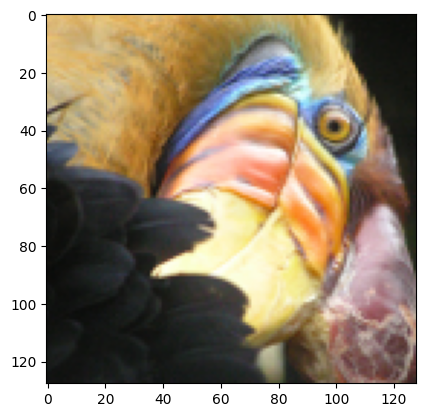

In [90]:
plt.imshow(original_img)

Check the dimensions of the image

In [91]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


This creates a three dimensional matrix where:
- the first two indices identify a pixel position, and
- the third index represents red, green, or blue.

For example, original_img[50, 33, 2] gives the blue intensity of the pixel at row 50 and column 33.

In [92]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

Run K-Means on image pixels

In [93]:
# Run K-Means algorithm on this data
K = 20
max_iters = 10

# Using the function you have implemented. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0 of 10
K-Means iteration 1 of 10
K-Means iteration 2 of 10
K-Means iteration 3 of 10
K-Means iteration 4 of 10
K-Means iteration 5 of 10
K-Means iteration 6 of 10
K-Means iteration 7 of 10
K-Means iteration 8 of 10
K-Means iteration 9 of 10


In [94]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [8 8 8 8 8]


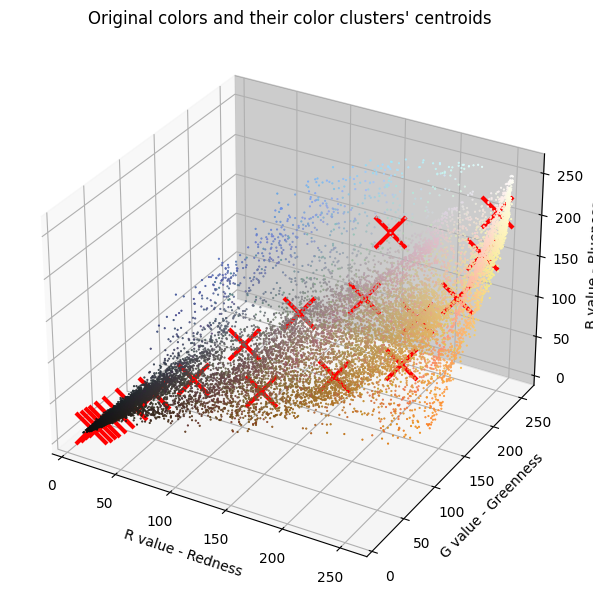

In [95]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

You can visualize the colors at each of the red markers (i.e. the centroids) above with the function below. The number below each color is its index and these are the numbers you see in the idx array.

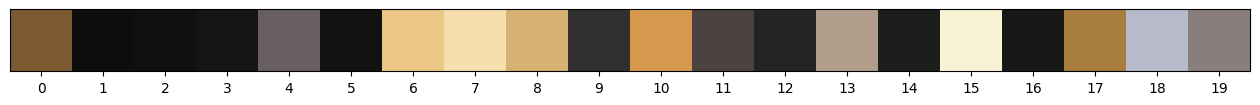

In [96]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

Compress the image

After finding the top  𝐾=20
colors to represent the image, we can now assign each pixel position to its closest centroid using the find_closest_centroids function.

In [97]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

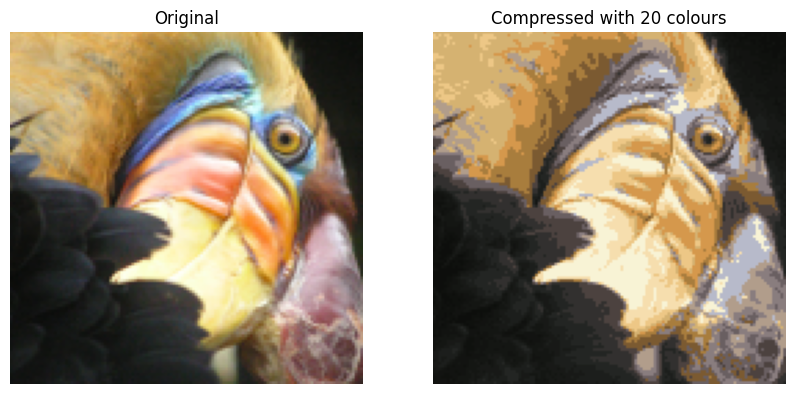

In [98]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()